### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
sns.set_palette('YlOrRd_r', n_colors = 3)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Vardan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../data/parkinsons_data.txt")

In [3]:
X = df.drop(['status', 'name'],axis = 1)
y = df['status']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 22)
(39, 22)
(156,)
(39,)


In [6]:
norm = StandardScaler().fit(X_train)
X_train_t = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_test_t = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

### KNN Algorithm

In [7]:
#Fitting and predicting KNN
knn = KNeighborsClassifier(n_neighbors = int(math.sqrt(len(df))))
knn.fit(X_train_t, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [8]:
y_train_pred = knn.predict(X_train_t)
y_pred = knn.predict(X_test_t)

### Predicting and evaluating model performance on train data

In [9]:
#Printing the performance measures of KNN model
print("Accuracy score")
print(accuracy_score(y_train, y_train_pred))
print('\n')
print("Classification report")
print(classification_report(y_train, y_train_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_train, y_train_pred))

Accuracy score
0.8910256410256411


Classification report
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.90      0.97      0.93       118

    accuracy                           0.89       156
   macro avg       0.88      0.81      0.84       156
weighted avg       0.89      0.89      0.89       156



ROC AUC score
0.8119982158786798


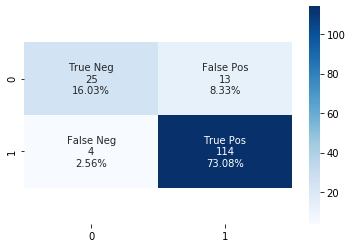

In [10]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Predicting and evaluating model performance on test data

In [11]:
#Printing the performance measures of KNN model
print("Accuracy score")
print(accuracy_score(y_test, y_pred))
print('\n')
print("Classification report")
print(classification_report(y_test, y_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_test, y_pred))

Accuracy score
0.8461538461538461


Classification report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



ROC AUC score
0.7655172413793103


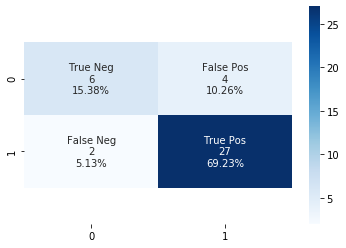

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [13]:
scores = cross_val_score(knn, X_train_t, y_train, cv=10)
print(scores)
print('\n')
print(scores.mean())

[1.         0.875      0.875      0.875      0.75       0.875
 1.         0.875      0.85714286 0.85714286]


0.8839285714285714


### Logistic Regression

In [14]:
logreg = LogisticRegression(random_state = 8)
logreg_parameters = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20),'class_weight':['balanced',None]}
grid_search = GridSearchCV(logreg, param_grid=logreg_parameters, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [15]:
model_logreg = grid_search.best_estimator_

In [16]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

### Predicting and evaluating model performance on train data

In [17]:
#Printing the performance measures of logreg model
print("Accuracy score")
print(accuracy_score(y_train, y_train_pred))
print('\n')
print("Classification report")
print(classification_report(y_train, y_train_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_train, y_train_pred))

Accuracy score
0.8653846153846154


Classification report
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        38
           1       0.86      0.98      0.92       118

    accuracy                           0.87       156
   macro avg       0.88      0.74      0.78       156
weighted avg       0.87      0.87      0.85       156



ROC AUC score
0.7415254237288136


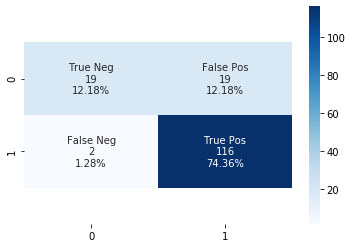

In [18]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Predicting and evaluating model performance on test data

In [19]:
#Printing the performance measures of logistic regresiion model
print("Accuracy score")
print(accuracy_score(y_test, y_pred))
print('\n')
print("Classification report")
print(classification_report(y_test, y_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_test, y_pred))

Accuracy score
0.8717948717948718


Classification report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39



ROC AUC score
0.8155172413793103


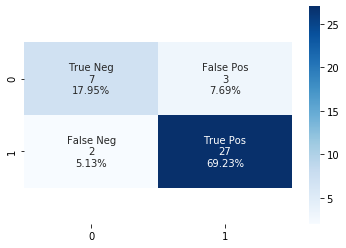

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [21]:
scores = cross_val_score(logreg, X_train_t, y_train, cv=10)
print(scores)
print(scores.mean())

[0.8125     0.8125     0.875      0.9375     0.6875     0.75
 0.8125     0.75       0.92857143 0.92857143]
0.8294642857142858


Feature: 0, Score: 0.0016
Feature: 1, Score: -0.0039
Feature: 2, Score: -0.0073
Feature: 3, Score: 0.0100
Feature: 4, Score: 0.0001
Feature: 5, Score: 0.0073
Feature: 6, Score: 0.0069
Feature: 7, Score: 0.0219
Feature: 8, Score: 0.0968
Feature: 9, Score: 0.9421
Feature: 10, Score: 0.0497
Feature: 11, Score: 0.0579
Feature: 12, Score: 0.0840
Feature: 13, Score: 0.1492
Feature: 14, Score: 0.0388
Feature: 15, Score: 0.0931
Feature: 16, Score: 0.5527
Feature: 17, Score: 0.5931
Feature: 18, Score: 1.0263
Feature: 19, Score: 0.3822
Feature: 20, Score: 2.0563
Feature: 21, Score: 0.5055


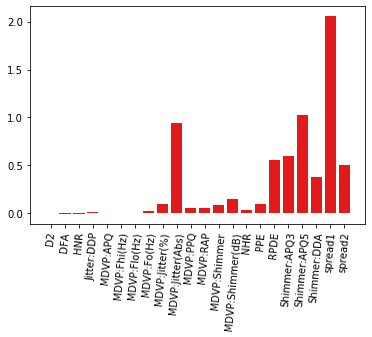

In [22]:
importance = model_logreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(['status', 'name'])], importance)
plt.xticks(df.columns.difference(['status', 'name']), rotation = '85')
plt.show()

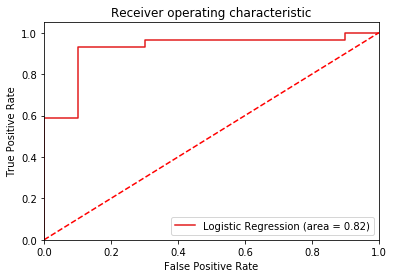

In [23]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test_t)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## DecisionTree

In [24]:
tree = DecisionTreeClassifier(random_state = 8)
tree_parameters = {'max_depth': range(2, 10),'min_samples_split':range(2, 12, 2),'criterion':['gini','entropy'],'class_weight':['balanced',None]}
grid_search = GridSearchCV(tree, param_grid=tree_parameters, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=8,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                   

In [25]:
model_tree = grid_search.best_estimator_

In [26]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

### Predicting and evaluating model performance on train data

In [27]:
#Printing the performance measures of decision tree model
print("Accuracy score")
print(accuracy_score(y_train, y_train_pred))
print('\n')
print("Classification report")
print(classification_report(y_train, y_train_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_train, y_train_pred))

Accuracy score
0.9807692307692307


Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.99      0.98      0.99       118

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.98      0.98      0.98       156



ROC AUC score
0.9783675289919714


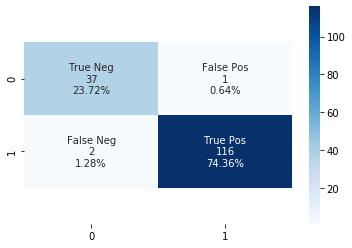

In [28]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Predicting and evaluating model performance on test data

In [29]:
#Printing the performance measures of decision tree model
print("Accuracy score")
print(accuracy_score(y_test, y_pred))
print('\n')
print("Classification report")
print(classification_report(y_test, y_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_test, y_pred))

Accuracy score
0.7948717948717948


Classification report
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39



ROC AUC score
0.7637931034482758


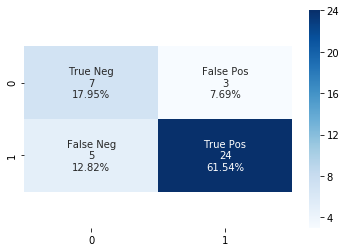

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [31]:
scores = cross_val_score(logreg, X_train_t, y_train, cv=10)
print(scores)
print(scores.mean())

[0.8125     0.8125     0.875      0.9375     0.6875     0.75
 0.8125     0.75       0.92857143 0.92857143]
0.8294642857142858


Feature: 0, Score: 0.1371
Feature: 1, Score: 0.0000
Feature: 2, Score: 0.0340
Feature: 3, Score: 0.0000
Feature: 4, Score: 0.0000
Feature: 5, Score: 0.0000
Feature: 6, Score: 0.0706
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0000
Feature: 9, Score: 0.0244
Feature: 10, Score: 0.0000
Feature: 11, Score: 0.0000
Feature: 12, Score: 0.0000
Feature: 13, Score: 0.0000
Feature: 14, Score: 0.0910
Feature: 15, Score: 0.0000
Feature: 16, Score: 0.0000
Feature: 17, Score: 0.0000
Feature: 18, Score: 0.0000
Feature: 19, Score: 0.0000
Feature: 20, Score: 0.0000
Feature: 21, Score: 0.6430


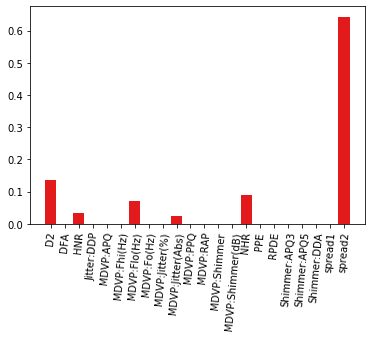

In [32]:
importance = model_tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(['status', 'name'])], importance)
plt.xticks(df.columns.difference(['status', 'name']), rotation = '85')
plt.show()

### Random forest


In [33]:
forest = RandomForestClassifier(random_state = 8)
forest_parameters = {'bootstrap': [True, False],
 'max_depth': range(8, 15),
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': range(5, 20),
 'class_weight':['balanced', None]}
grid_search = GridSearchCV(forest, param_grid=forest_parameters, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'b

In [34]:
model_forest = grid_search.best_estimator_

In [35]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

### Predicting and evaluating model performance on train data

In [36]:
#Printing the performance measures of random forest model
print("Accuracy score")
print(accuracy_score(y_train, y_train_pred))
print('\n')
print("Classification report")
print(classification_report(y_train, y_train_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_train, y_train_pred))

Accuracy score
0.9871794871794872


Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.98      1.00      0.99       118

    accuracy                           0.99       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.99      0.99      0.99       156



ROC AUC score
0.9736842105263158


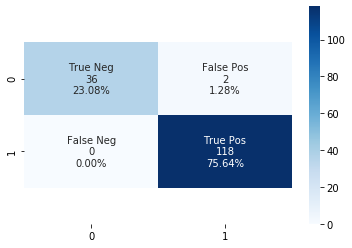

In [37]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Predicting and evaluating model performance on test data

In [38]:
#Printing the performance measures of random forest model
print("Accuracy score")
print(accuracy_score(y_test, y_pred))
print('\n')
print("Classification report")
print(classification_report(y_test, y_pred))
print('\n')
print("ROC AUC score")
print(roc_auc_score(y_test, y_pred))

Accuracy score
0.9230769230769231


Classification report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



ROC AUC score
0.8827586206896553


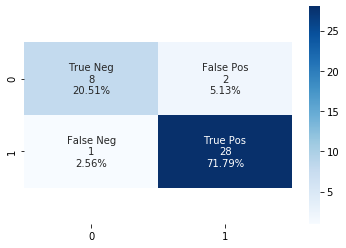

In [39]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [40]:
scores = cross_val_score(logreg, X_train_t, y_train, cv=10)
print(scores)
print(scores.mean())

[0.8125     0.8125     0.875      0.9375     0.6875     0.75
 0.8125     0.75       0.92857143 0.92857143]
0.8294642857142858


Feature: 0, Score: 0.0692
Feature: 1, Score: 0.0242
Feature: 2, Score: 0.0605
Feature: 3, Score: 0.0024
Feature: 4, Score: 0.0625
Feature: 5, Score: 0.0305
Feature: 6, Score: 0.0218
Feature: 7, Score: 0.0271
Feature: 8, Score: 0.0004
Feature: 9, Score: 0.0296
Feature: 10, Score: 0.0297
Feature: 11, Score: 0.0512
Feature: 12, Score: 0.0362
Feature: 13, Score: 0.0218
Feature: 14, Score: 0.1046
Feature: 15, Score: 0.0157
Feature: 16, Score: 0.0181
Feature: 17, Score: 0.0239
Feature: 18, Score: 0.0949
Feature: 19, Score: 0.0124
Feature: 20, Score: 0.0302
Feature: 21, Score: 0.2330


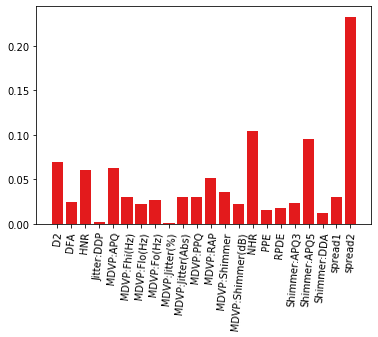

In [41]:
importance = model_forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(['status', 'name'])], importance)
plt.xticks(df.columns.difference(['status', 'name']), rotation = '85')
plt.show()

In [42]:
models = []
models.append(('KNN', knn))
models.append(('Logistic Regression', model_logreg))
models.append(('Decision Tree Classifier', model_tree))
models.append(('Random Forest', model_forest))
acc_results = []
auc_results = []
f_1_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD',"F1 score Mean", "F1 score STD"]
df_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    cv_acc_results = cross_val_score(model, X_train_t, y_train, cv=5, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train_t, y_train, cv=5, scoring='roc_auc')
    cv_f_1_results = cross_val_score(model, X_train_t, y_train, cv=5, scoring='f1')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    f_1_results.append(cv_f_1_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2),
                         round(cv_f_1_results.mean()*100, 2),
                         round(cv_f_1_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,F1 score Mean,F1 score STD
3,Random Forest,92.82,3.26,91.63,3.91,94.55,2.62
2,Decision Tree Classifier,85.52,7.00,87.96,4.81,91.92,3.43
0,KNN,90.06,7.45,84.71,8.18,90.49,5.09
1,Logistic Regression,89.17,6.15,82.79,6.26,88.76,4.44


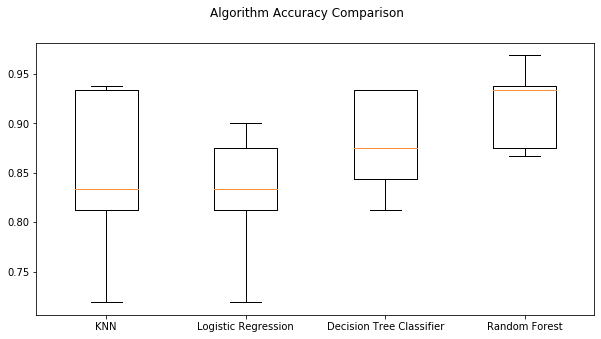

In [43]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

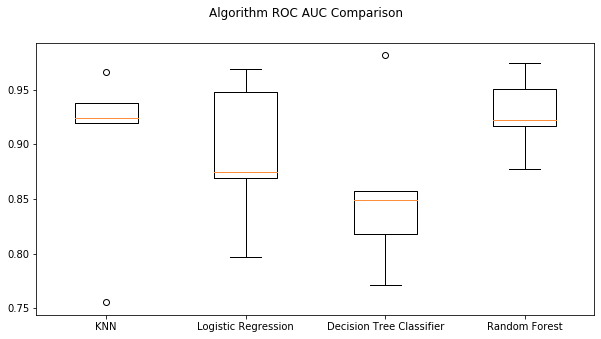

In [44]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [45]:
final_model = model_forest.fit(X_train, y_train)